In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import time
from scipy import sparse

# Questions 1 & 2
## Question 1: Solving the DDP by value function iteration ; discrete state space

In [371]:
# Define primitives
def u_f1(S,y):
    '''Utility function version 1'''
    U = 2*y**0.5
    if y > S:
        U = -100000000
    return U

def u_f2(S,y):
    '''Utility function version 2'''
    U = 5*y - 0.05*y**2
    if y > S:
        U = -100000000
    return U

def Bellman_simple(Vp, ik, jk, utilitymatrix):
    Value = utilitymatrix[ik, jk] + δ * Vp[ik-jk]
    return(Value)

def Bellman_interp(Vp, ik, jk, utilitymatrix, T):
    ''' 
    Bellman : value function for state variable Kgrid[ik] with policy Kgrid[jk]
    Given utility matrix computed before (to reduce computational burden)
    ''' 
    N = len(T)
    beg = N*jk
    fin = N*(jk+1)
    subT = T[ik, beg:fin] # get the index of the new state by subsetting in the transition matrix
    state_new = np.where(subT > 0)[0]
    if 
    state_new1 = state_new[0]
    state_new2 = state_new[1]
    weight1 = subT[state_new1]
    weight2 = subT[state_new2]
    Vnext = Vp[state_new1]*weight1 + Vp[state_new2]*weight2
    
    Value = utilitymatrix[ik, jk]  + δ * Vnext
    return (Value)

def g_hat(Kgrid, jk): return(Kgrid[jk]) #policy function

# Price functions = derivatives of utility functions wrt extraction (MU)
def p1_f(C1):
    return (1/(C1**0.5))

def p2_f(C2):
    return (5 - 0.1*C2)

In [366]:
utilitymatrix = np.ones((N, Na))
for i in range(0, N):
    for j in range(0, Na):
        utilitymatrix[i,j] = u_f1(S2[i], A2[j])
        
T = T_f(S2, A2, interp=True)

In [372]:
def T_f(S, A, interp=True):
    
    # Initialize
    N = len(S)
    Na = len(A)
    T = np.zeros((N, N*Na))

    # For each action indexed k, and each initial state i, compute resulting state j
    '''
    if interp==False:
        for i in range(N):
            for k in range(Na):
                next = max(S[i] - A[k], 0.0)
                j_raw = np.where(S == next)[0]
                j_adj = j_raw + N*k
                T[i, j_adj] = 1
    '''
    
    if interp==True:
        for i in range(N):
            print(i)
            for k in range(Na):
                diff = S[i] - A[k]
                if diff < 0:
                    index1_raw = 0
                    index1_adj = index1_raw + (N)*k
                    T[i, index1_adj] = 1.0
                if diff >= 0:
                    dist = S - diff # How far from the difference is each element of S
                    index1_raw = np.where(dist == sorted(dist > 0)[0])[0][0] # Find the index of the closest
                    index2_raw = np.where(dist == sorted(dist)[1])[0][0] # Find the index of the second closest
                    weight1 = 1 - sorted(dist)[0] / np.sum(sorted(dist)[0:2])
                    weight2 = 1 - sorted(dist)[1] / np.sum(sorted(dist)[0:2])
                    index1_adj = index1_raw + (N)*k
                    index2_adj = index2_raw + (N)*k
                    T[i, index1_adj] = weight1
                    T[i, index2_adj] = weight2
                '''
                next = max(S[i] - A[k], 0.0)
                diff = S[i] - A[k]
                dist = abs(S - diff) # How far from the difference is each element of S
                index1_raw = np.where(dist == sorted(dist)[0])[0][0] # Find the index of the closest
                index2_raw = np.where(dist == sorted(dist)[1])[0][0] # Find the index of the second closest
                weight1 = 1 - sorted(dist)[0] / np.sum(sorted(dist)[0:2])
                weight2 = 1 - sorted(dist)[1] / np.sum(sorted(dist)[0:2])
                index1_adj = index1_raw + (N)*k
                index2_adj = index2_raw + (N)*k
                T[i, index1_adj] = weight1
                T[i, index2_adj] = weight2
                '''
    return(T)


In [ ]:
def VFI(State_grid, Action_grid, V0, maxiter, tol, Uo, δ=0.9, howard=True, print_i=True, interp=False):

    ### Initiate vectors & numbers
    iter = 0
    epsi = 1
    Kp_new = np.zeros(len(Action_grid))
    Vp_new = np.zeros(len(State_grid))
    gk = np.zeros(len(Action_grid))
    Vp = V0
    N = len(State_grid)
    Na = len(Action_grid)
    
    # Initiate the utility matrix & compute it
    utilitymatrix = np.ones((N, Na))
    if Uo == "U1":
        for i in range(0,N):
            for j in range(0,Na):
                utilitymatrix[i,j] = u_f1(S[i], A[j]) 
    if Uo == "U2":
        for i in range(0,N):
            for j in range(0,Na):
                utilitymatrix[i,j] = u_f2(S[i], A[j]) 

    while (epsi > tol) & (iter < maxiter):
        for ik in range(N):
            # ik = index of the stock today
            # d = max extraction < current stock
            #d = int(gk[max(ik-1), 0])
            d = 0

            #Value function Tj for each choice g(k)
            Tj = np.zeros(len(Kgrid)-d)

            # Compute the value function Tj for each choice of g(k)
            for jk in range(d, len(Kgrid)):
                Tj[jk - d] = Bellman(Kgrid, Vp, ik, jk, utilitymatrix)

            # Choose the maximum
            Vp_new[ik] = np.max(Tj)
            Kp_new[ik] = d + int(np.where(Tj==max(Tj))[0])

        if howard=="True":
            for c in range(100):
                for ik in range(len(Kgrid)):
                    jk = int(Kp_new[ik])
                    Vp_new[ik] = Bellman(Kgrid, Vp_new, ik, jk, utilitymatrix)


        ### Check the error
        epsi = np.abs(Vp_new - Vp).max()

        ### Keep track of what is going on
        print("iteration is ", iter, " and Error term is ", epsi)
        Kp = Kp_new*1. #Update
        Vp = Vp_new*1. #Update
        
        if epsi < tol:
            break

        iter=iter+1

    #Calculate Values for g(k)
    for jk in range(len(Kgrid)):
        gk[jk] = Kgrid[int(Kp[jk])]
        
    # Calculate the N*N optimal transition matrix T_opt that gives the state transition proba under optimal action
    return[Vp, gk, Kp, iter]

In [373]:
### Parameters
r = 0.05
δ = 1/(1+r)
Stot = 1000

N = 501
Na = 501
S = np.linspace(0,1000,N)
A = np.linspace(0,1000,Na)
V0 = np.zeros(N)

### Solve the model and find the N*N optimal transion matrix $T_{opt}$

In [382]:
### Utility 1
[Vp1, IndexAction1, Action1, iter1] = VFI(S, A, V0, Uo = "U1", print_i="True", interp=False)

# Calculate the N*N optimal transition matrix
T_opt1 = np.zeros((N, N))
for ik in range(N):
    ij = np.where(S == S[ik] - Action1[ik])[0][0]
    T_opt1[ik, ij] = 1  


    ### Utility 2
[Vp2, IndexAction2, Action2, iter2] = VFI(S, A, V0, Uo = "U2", print_i="True", interp=False)

# Calculate the N*N optimal transition matrix
T_opt2 = np.zeros((N, N))
for ik in range(N):
    ij = np.where(S == S[ik] - Action2[ik])[0][0]
    T_opt2[ik, ij] = 1  


Compute the Utility matrix
start iterations
iteration is  0
 and Error term is  63.245553203367585
iteration is  1
 and Error term is  67.83583420949506
iteration is  2
 and Error term is  51.947702269407074
iteration is  3
 and Error term is  18.264705133712255
iteration is  4
 and Error term is  5.266899929960374
iteration is  5
 and Error term is  1.3563807400215637
iteration is  6
 and Error term is  0.9390429934964644
iteration is  7
 and Error term is  0.8385374759369313
iteration is  8
 and Error term is  0.7428179354040374
iteration is  9
 and Error term is  0.6516564682298558
iteration is  10
 and Error term is  0.5648360233020604
iteration is  11
 and Error term is  0.48214988527558944
iteration is  12
 and Error term is  0.40340118239323886
iteration is  13
 and Error term is  0.32840241774337997
iteration is  14
 and Error term is  0.25697502283875195
iteration is  15
 and Error term is  0.1889489324533855
iteration is  16
 and Error term is  0.12416217970542931
iteration i

In [381]:
Vp1

array([  0.        ,   2.82842712,   5.52216724,   8.08763402,
        10.53093572,  12.85788971,  15.07403638,  17.18465224,
        19.1947626 ,  21.10915341,  22.93238275,  24.66879165,
        26.32251441,  27.89748847,  29.39746376,  30.82601166,
        32.18653347,  33.48226852,  34.71630191,  35.8915718 ,
        37.06314467,  38.18244933,  39.29823302,  40.36423746,
        41.42688859,  42.44213091,  43.45417961,  44.42107706,
        45.38493296,  46.30578768,  47.22374568,  48.12272516,
        48.99972965,  49.87397537,  50.73014631,  51.56538868,
        52.39800365,  53.21340454,  54.00887347,  54.8018401 ,
        55.57841238,  56.33628715,  57.0938766 ,  57.84908292,
        58.58867557,  59.31046106,  60.03197482,  60.75121893,
        61.45559288,  62.14300764,  62.8301636 ,  63.515158  ,
        64.18599033,  64.8536914 ,  65.50837212,  66.16280637,
        66.81518198,  67.45406992,  68.0899757 ,  68.71348115,
        69.33675186,  69.95806197,  70.56652667,  71.17

### Simulate the model for t = 80 periods, $S_0 = 100$

In [270]:
# St = each period's stock
# C = each period's extraction

## Simulate 1
St1 = 1000*np.ones(80)
C1 = np.zeros(80)
for i in range(80-1):
    init_index1 = np.where(S==St1[i])[0][0]
    C1[i] = Action1[init_index1]
    final_index1 = np.where(T_opt1[init_index1,]==1)[0][0]
    St1[i+1] = S[final_index1]
p1 = p1_f(C1)

## Simulate 2
St2 = 1000*np.ones(80)
C2 = np.zeros(80)
for i in range(80-1):
    init_index2 = np.where(S==St2[i])[0][0]
    C2[i] = Action2[init_index2]
    final_index2 = np.where(T_opt2[init_index2,]==1)[0][0]
    St2[i+1] = S[final_index2]
    
p2 = p2_f(C2)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


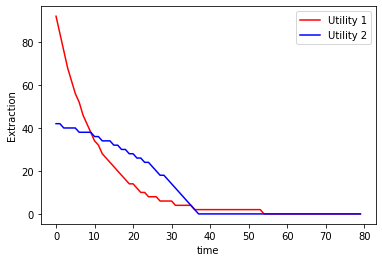

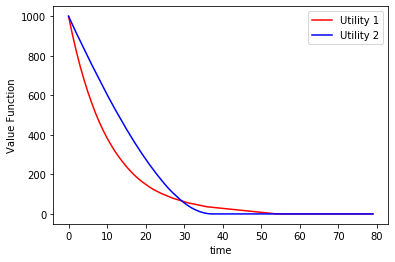

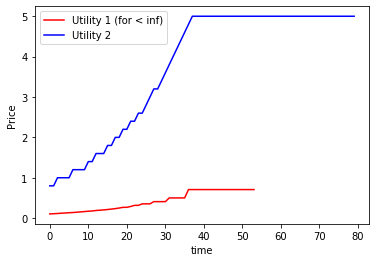

In [272]:
plt.plot(range(0,80), C1, color="red", label="Utility 1")
plt.plot(range(0,80), C2, color="blue", label="Utility 2")
plt.xlabel("time")
plt.ylabel("Extraction")
plt.legend()
plt.show()

plt.plot(range(0,80), St1, color="red", label="Utility 1")
plt.plot(range(0,80), St2, color="blue", label="Utility 2")
plt.xlabel("time")
plt.ylabel("Value Function")
plt.legend()
plt.show()

# For printing purposes
plt.plot(range(0,80), p1, color="red", label="Utility 1 (for < inf)")
plt.plot(range(0,80), p2, color="blue", label="Utility 2")
plt.xlabel("time")
plt.ylabel("Price")
plt.legend()
plt.show()

## Question 2: Interpolating Between the States

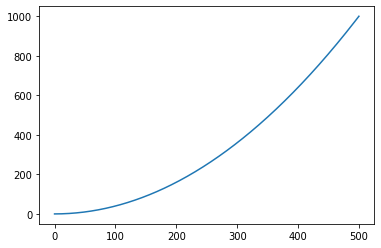

In [35]:
N2 = 501
Na2 = 501
S2 = np.linspace(0,1000,N2)
A2 = np.linspace(0,(1000**0.5),Na2)**2
plt.plot(range(501), A2)

In [374]:
[Vp1, gk1, Kp1, iter1] = VFI(Kgrid2, V0, maxiter, tol, "U1", δ, howard="True", print_i="False")

Compute the Transition matrix
Compute the Utility matrix
start iterations
WIP


TypeError: only size-1 arrays can be converted to Python scalars

In [65]:
# Calculate the N*N optimal transition matrix
T_opt1_v2 = np.zeros((N, N))
for ik in range(N):
    diff = S2[ik] - Action1_v2[ik]
    dist = abs(S2 - diff) # How far from the differenre is each element of S2
    index1 = np.where(dist == sorted(dist)[0])[0][0] # Find the index of the closest
    index2 = np.where(dist == sorted(dist)[1])[0][0] # Find the index of the second closest
    weight1 = sorted(dist)[0] / np.sum(sorted(dist)[0:2])
    weight2 = sorted(dist)[1] / np.sum(sorted(dist)[0:2])
    weight1 + weight2 == 1 
    T_opt1_v2[ik, index1] = weight1
    T_opt1_v2[ik, index2] = weight2 

In [63]:
T_v2 = np.zeros((N, N*Na))

2.0

In [ ]:
# Calculate the N*N optimal transition matrix
T_opt1 = np.zeros((N, N))
for ik in range(N):
    diff = Kgrid[ik] - gk1[ik]
    ij = np.where(Kgrid == Kgrid[ik] - gk1[ik])[0][0]
    T_opt1[ik, ij] = 1    

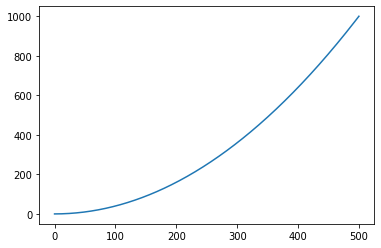

In [84]:
St1 = 1000*np.ones(80)
C1 = np.zeros(80)
for i in range(80-1):
    init_index1 = np.where(Kgrid==St1[i])[0][0]
    C1[i] = gk1[init_index1]
    final_index1 = np.where(T_opt1[init_index1,]==1)[0][0]
    final1 = Kgrid[final_index1]
    St1[i+1] = final1
p1 = p1_f(C1)